수정일: 2024.02.09

#HW2: Housing Price Prediction

이번 과제에서는 linear regression을 이용해 집값을 예측하려고 한다. 아래 나오는 내용들을 잘 읽어보고 지시에 따라 코드를 완성해 보자.

우선 필요한 모듈을 불러오고, 필요한 셋팅을 한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import urllib # 데이터셋을 다운로드 받기 위해 필요

## 데이터
아래 코드를 실행시키면, 과제에 필요한 데이터를 다운로드한다. 데이터 파일의 이름은 housing_prices.txt이다.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IhCTHicT0lVt_SAYwaLNPokyC-TOMJGL' -O housing_prices.txt

--2024-02-09 03:48:27--  https://docs.google.com/uc?export=download&id=1IhCTHicT0lVt_SAYwaLNPokyC-TOMJGL
Resolving docs.google.com (docs.google.com)... 172.217.212.138, 172.217.212.101, 172.217.212.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1IhCTHicT0lVt_SAYwaLNPokyC-TOMJGL&export=download [following]
--2024-02-09 03:48:27--  https://drive.usercontent.google.com/download?id=1IhCTHicT0lVt_SAYwaLNPokyC-TOMJGL&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.74.132, 2607:f8b0:4001:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.74.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [application/octet-stream]
Saving to: ‘housing_prices.txt’

housing_prices.txt  100%[===================>]     657  --.-KB/s    in 0

다운로드 받은 파일을 읽고, 잘 읽었는지 확인하기 위해 일부 데이터를 출력한다.

housing_prices.txt 파일 안에는 데이터가 텍스트 파일로 저장되어 있으며, 각각의 값은 쉼표(comma)로 구분된다. 이러한 파일은 NumPy의 [loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) 함수로 불러올 수 있다.

데이터의 첫 번째 열(column)은 집의 크기(ft<sup>2</sup>), 두 번째 열은 방의 개수, 세 번째 열은 집의 가격($)을 나타낸다.

In [ ]:
dataset = np.loadtxt("housing_prices.txt", dtype=np.float64, delimiter=",")
dataset[:5, ::]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

불러온 데이터를 입력 변수(input variable)와 출력 변수(output variable)로 분리한다. 이는 NumPy의 [슬라이싱](https://numpy.org/doc/stable/reference/arrays.indexing.html)을 이용하면 된다.

In [ ]:
X = dataset[:, :2] # 첫 번째와 두 번째 열. 크기가 (데이터 개수, 2)
Y = dataset[:, -1] # 마지막 열. 크기가 (데이터 개수, 1)
m, n = X.shape # 데이터 개수와 feature의 수

분리한 데이터의 일부를 출력해본다.

In [ ]:
print("X의 크기:", X.shape)
print("Y의 크기:", Y.shape)
print("데이터 개수:", m)
print("Feature 수:", n)

print("X:")
print(X[:5,:])

print("Y:")
print(Y[:5])

X의 크기: (47, 2)
Y의 크기: (47,)
데이터 개수: 47
Feature 수: 2
X:
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
Y:
[399900. 329900. 369000. 232000. 539900.]


불러온 데이터를 그래프로 출력한다.

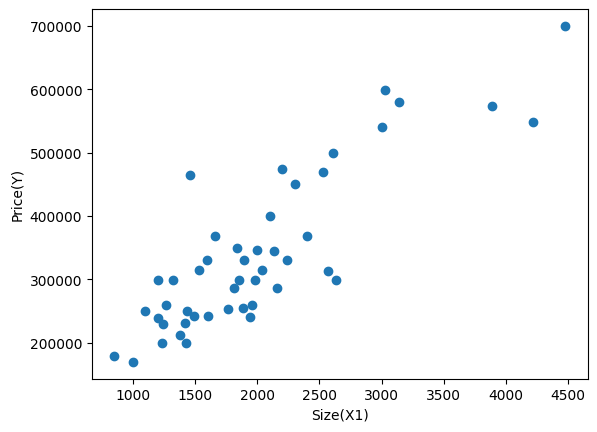

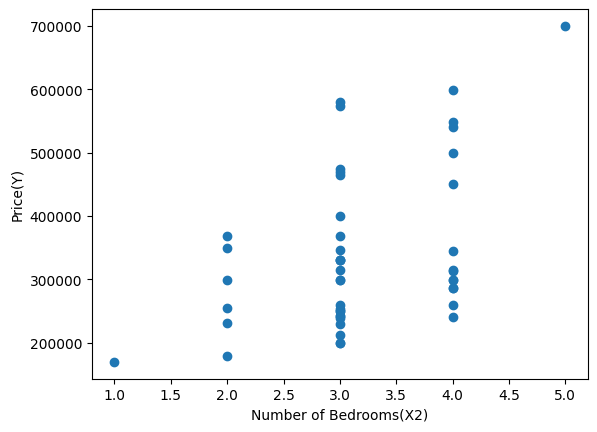

In [ ]:
fig, axes = plt.subplots()

axes.scatter(X[:, 0], Y)
axes.set_xlabel("Size(X1)")
axes.set_ylabel("Price(Y)")
plt.show()

fig, axes = plt.subplots()

axes.scatter(X[:, -1:], Y)
axes.set_xlabel("Number of Bedrooms(X2)")
axes.set_ylabel("Price(Y)")
plt.show()

## Feature Scaling
데이터를 보면 x<sub>1</sub>과 x<sub>2</sub>의 데이터 범위가 크게 차이가 난다. 따라서 feature scaling을 통해 값의 범위를 조정해 줄 것이다. 여기서는 mean normalization을 이용해 feature scaling을 한다. Mean normalization에서는 각 feature 또는 열에 대해 평균 $\mu$과 표준편차 $\sigma$를 계산하고, 다음 식을 이용해 값을 변경한다.

$x_i=\cfrac{x_i-\mu_i}{\sigma_i}$

평균은 NumPy의 [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) 함수를 이용하면 되고, 표준편차는 [std](https://numpy.org/doc/stable/reference/generated/numpy.std.html) 함수를 이용하면 된다. 단, axis 값을 적절하게 설정해야 한다.

x<sub>1</sub>과 x<sub>2</sub>의 값이 변경되었으므로, 원래 값과의 관계를 알기 위해 평균과 표준편차를 저장해 놓아야 한다.

**지시: feature_scaling을 해주는 아래 함수를 완성한다.**

In [ ]:
def feature_scaling(X):
  '''
  입력 변수 X를 feature scaling한 후 값을 반환하는 함수

  매개변수:
    X: 입력 변수, NumPy 2차원 배열

  반환:
    feature scaling한 X, NumPy 2차원 배열
    X의 각 열에 대한 평균값, 스칼라 1차원 배열
    X의 각 열에 대한 표준편차, 스칼라 1차원 배열
  '''

  ## X의 각 열에 대한 평균을 계산하여 변수 mean에 저장할 수 있도록,
  ## 아래 코드를 적절히 수정하시오.
  ## X의 전체 평균이 아닌, 각 열마다 평균을 구해야한다.
  ## NumPy의 broadcasting을 이용하면 한 줄로 계산할 수 있다.
  #### 코드 시작 ####
  mean = np.mean(X, axis=0)
  #### 코드 종료 ####

  ## X의 각 열에 대한 표준편차를 계산하여 변수 std에 저장할 수 있도록,
  ## 아래 코드를 적절히 수정하시오.
  ## X의 전체 평균이 아닌, 각 열마다 평균을 구해야한다.
  ## NumPy의 broadcasting을 이용하면 한 줄로 계산할 수 있다.
  #### 코드 시작 ####
  std = np.std(X, axis=0)
  #### 코드 종료 ####

  ## X의 값에 대해 mean normalization을 수행한다.
  ## NumPy의 broadcasting을 이용하면 한 줄로 계산할 수 있다.
  ## 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  X_scaling = (X - mean) / std
  #### 코드 종료 ####

  return X_scaling, mean, std

Feature scaling을 한 후의 x<sub>1</sub>과 x<sub>2</sub>는 평균이 0, 표준편차가 1에 가까워야 한다.

In [ ]:
# 평균 mean과 표준편차 std를 기억해 놓는다.
# 이 뒤부터는 X 대신 X_scaling을 이용한다.
X_scaling, mean, std = feature_scaling(X)

# 아래는 테스트 코드이다.
assert abs(mean[0] - 2000.68085106) < 0.0001
assert abs(mean[1] - 3.17021277) < 0.0001
assert abs(std[0] - 7.86202619e+02) < 0.0001
assert abs(std[1] - 7.52842809e-01) < 0.0001

print("성공!")

성공!


## x<sub>0</sub> 열 추가
Multivariate linear regression에서는 수식을 단순하게 만들기 위해 x<sub>0</sub>=1의 값을 가지는 열을 추가한다. 이는 hypothesis 함수를 행렬로 단순하게 표현할 수 있게 한다.

$h(\theta)=\begin{bmatrix}\theta_0 & \theta_1 & ... & \theta_n\end{bmatrix}
\begin{bmatrix}x_0=1 \\ x_1 \\ ... \\ x_n\end{bmatrix}=\theta^T x$

In [ ]:
X_bias = np.ones((m, n+1))
X_bias[:, 1:] = X_scaling

print(X_bias[:5,:])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


## Hypothesis 함수
집값을 예측하기 위한 hypothesis 함수를 정의한다. Hyphothesis 함수는 다음과 같은 형태를 갖는다.

$h(\theta)=\begin{bmatrix}\theta_0 & \theta_1 & ... & \theta_n\end{bmatrix}
\begin{bmatrix}x_0=1 \\ x_1 \\ ... \\ x_n\end{bmatrix}=\theta^T x$

이는 $\theta$와 x의 행렬곱 또는 내적을 이용해 쉽게 계산할 수 있다.

행렬곱 또는 내적은 NumPy의 [dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) 함수를 이용하면 된다.

**지시: Hypothesis 함수를 계산하는 아래 함수를 완성한다.**

In [ ]:
def compute_hypothesis(X_bias, theta):
  '''
  입력 변수 X_bias와 theta에 대해 hypothesis 함수의 값을 계산하여 반환하는 함수

  매개변수:
    X_bias: x0가 추가된 입력 변수, NumPy 2차원 배열
    theta: parameter 값, NumPy 1차원 배열

  반환:
    Hypothesis 함수의 값, NumPy 1차원 배열
  '''

  ## X_bias와 theta를 이용하여 hypothesis 함수의 값을 계산한다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  h = np.dot(X_bias, theta)
  #### 코드 종료 ####

  return h

아래 코드는 테스트 코드이다. "성공!"이라고 출력되어야 한다.

In [ ]:
# 함수 compute_hypothesis()의 테스트 코드

h_temp1 = compute_hypothesis(X_bias, [0, 0, 0])
assert h_temp1.size == 47
assert h_temp1.shape == (47,)
assert np.all(h_temp1 == 0)

h_temp2 = compute_hypothesis(X_bias, [0.1, 2, 0.5])
assert h_temp2.size == 47
assert h_temp2.shape == (47,)
assert abs(h_temp2[0] - 0.24978416) < 0.0001
assert abs(h_temp2[1] + 1.03232808) < 0.0001

print("성공!")

성공!


## Loss 함수
Hypothesis 함수를 찾는데 사용할 loss 함수를 계산한다. Gradient descent 알고리즘에서는 loss 함수를 직접 이용하지는 않는다. 그러나 수렴성을 확인하기 위한 목적으로 loss 값을 저장한다.

Loss 함수는 다음과 같이 계산할 수 있다.

$J(\theta)=\cfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$

합계는 NumPy의 [sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) 함수를 이용하면 쉽게 계산할 수 있다.

**지시: Loss 함수를 계산하는 아래 함수를 완성한다.**

In [ ]:
def compute_loss(X_bias, Y, theta):
  '''
  theta에 대해 loss 함수의 값을 계산하여 반환하는 함수

  매개변수:
    X_bias: x0가 추가된 입력 변수, NumPy 2차원 배열
    Y: 출력 변수, NumPy 1차원 배열
    theta: parameter 값, NumPy 1차원 배열

  반환:
    theta에서의 loss 값, 스칼라
  '''

  m = Y.size # 데이터의 갯수

  ## X_bias와 theta를 이용하여 hypothesis 함수의 값을 계산한다.
  ## 이 때, 앞에서 구현한 compute_hypothesis() 함수를 이용한다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  h = compute_hypothesis(X_bias, theta)
  #### 코드 종료 ####

  ## Y와 h를 이용하여 loss 값을 계산한다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  J = np.sum((h - Y)**2) / (2*m)
  #### 코드 종료 ####

  return J

아래 코드는 테스트 코드이다. "성공!"이라고 출력되어야 한다.

In [ ]:
# 함수 compute_loss()의 테스트 코드

J_temp1 = compute_loss(X_bias, Y, [0, 0, 0])
assert abs(J_temp1 - 65591548106.45744) < 0.0001

J_temp2 = compute_loss(X_bias, Y, [3, 2, 5])
assert abs(J_temp2 - 65590041820.70264) < 0.0001

print("성공!")

성공!


## Gradient 함수
Gradient descent 방법을 이용하기 위해서는 loss 함수의 gradient를 계산해야 한다.

Gradient는 다음과 같이 계산할 수 있다.

$\frac{\partial}{\partial \theta_j}J(\theta)=\cfrac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)}) x_{j}^{(i)}$

위의 gradient 계산 식은 NumPy의 [dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) 함수를 이용하면 쉽게 계산할 수 있다.

**지시: Loss의 gradient를 계산하는 아래 함수를 완성한다.**

In [ ]:
def compute_gradient(X_bias, Y, theta):
  '''
  theta에 대해 loss의 gradient 값을 계산하여 반환하는 함수

  매개변수:
    X_bias: x0가 추가된 입력 변수, NumPy 2차원 배열
    Y: 출력 변수, NumPy 1차원 배열
    theta: parameter 값, NumPy 1차원 배열

  반환:
    theta에서의 loss의 gradient 값, NumPy 1차원 배열
  '''

  m, n = X.shape # 데이터 개수와 feature의 수

  ## X_bias와 theta를 이용하여 hypothesis 함수의 값을 계산한다.
  ## 이 때, 앞에서 구현한 compute_hypothesis() 함수를 이용한다.
  ## compute_loss() 함수에서도 동일한 값을 계산한 적이 있다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  h = compute_hypothesis(X_bias, theta)
  #### 코드 종료 ####

  ## h와 X_bias, Y를 이용해 gradient를 계산한다.
  ## gradient는 np.dot을 이용하면 쉽게 계산할 수 있다.
  ## 이를 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  dJ = np.dot((h - Y), X_bias) / m
  #### 코드 종료 ####

  return dJ

아래 코드는 테스트 코드이다. "성공!"이라고 출력되어야 한다.

In [ ]:
# 함수 compute_gradient()의 테스트 코드

dJ_temp1 = compute_gradient(X_bias, Y, [0, 0, 0])
assert abs(dJ_temp1[0] + 340412.65957447) < 0.0001
assert abs(dJ_temp1[1] + 105764.13349282) < 0.0001
assert abs(dJ_temp1[2] + 54708.82175587) < 0.0001

dJ_temp2 = compute_gradient(X_bias, Y, [3, 2, 5])
assert abs(dJ_temp2[0] + 340409.65957447) < 0.0001
assert abs(dJ_temp2[1] + 105759.33365679) < 0.0001
assert abs(dJ_temp2[2] + 54702.70182146) < 0.0001

print("성공!")

성공!


## Gradient Descent
수업 시간에 배운 내용을 바탕으로 gradient descent 알고리즘을 구현한다. Gradient descent 알고리즘의 핵심은 다음 식을 일정 횟수만큼 반복하여 계산하는 것이다.

$\theta^{(k+1)}=\theta^{(k)}-a\nabla J(\theta^{(k)})$

**지시: Gradient descent 알고리즘을 수행하는 아래 코드를 완성한다.**

In [ ]:
# Hyperparameter를 설정한다.
# 사용자가 변경할 수 있다.
iterations = 1000 # 반복 회수
learning_rate = 0.1 # Learning rate
theta = np.zeros((n+1,)) # theta의 초기값은 0으로 설정

# 학습 상황을 저장하기 위한 변수
history = np.zeros((iterations + 1, n+1))
history[0, :n+1] = theta
history[0, -1] = compute_loss(X_bias, Y, theta)

for iter in range(iterations):
  ## gradient descent의 반복식을 나타내기 위해,
  ## 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  theta = theta - learning_rate * compute_gradient(X_bias, Y, theta)
  #### 코드 종료 ####

  # 수렴성을 확인하기 위해 매 iteration마다 loss를 계산한다.
  loss = compute_loss(X_bias, Y, theta)

  # 그래프 출력을 위해 중간 결과를 저장한다.
  history[iter + 1, :n+1] = theta
  history[iter + 1, -1] = loss

# 아래 결과가 [340412.65957447 109447.79646964  -6578.35485416]과 비슷하게 나와야 한다.
print("Theta found by gradient descent:", theta)

Theta found by gradient descent: [340412.65957447 109447.79646964  -6578.35485416]


아래 코드는 매 iteration 마다 loss가 변하는 과정을 그래프로 보여준다. Iteration이 진행됨에 따라서 loss가 감소해야 한다.

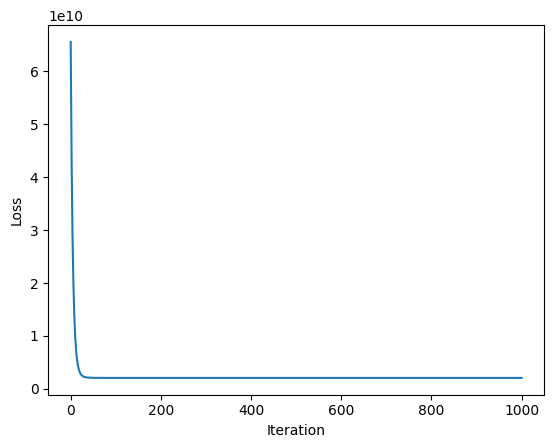

In [ ]:
def plot_loss_history(history):
  x = np.arange(0, history.shape[0])
  y = history[:, -1]

  fig, axes = plt.subplots()
  axes.plot(x, y)
  axes.set_xlabel("Iteration")
  axes.set_ylabel("Loss")

plot_loss_history(history)
plt.show()

현재 찾은 $\theta$ 값을 이용해 집값을 예측해 볼 수 있다. 크기가 1,650(ft<sup>2</sup>)이고 방의 개수가 3개인 경우의 집값을 예측해보자. 단, x의 값으로 1,650과 3을 그대로 사용하면 안되고, 앞에서 구한 평균과 표준편차를 반영해 주어야 한다. 또한, x<sub>0</sub>=0인 값을 추가해 주어야 한다.

In [ ]:
# 집값을 예측하기 위한 코드
def predict(mean, std, theta, x):
  x_scaling = (x - mean) / std
  x_bias = np.ones((x.size+1))
  x_bias[1:] = x_scaling

  h = compute_hypothesis(x_bias, theta)
  return h

x_predict = np.array([1650.0, 3])
y_predict = predict(mean, std, theta, x_predict)
print("크기 1650, 방의 개수 3인 집의 가격은 $", y_predict, "입니다")

크기 1650, 방의 개수 3인 집의 가격은 $ 293081.46433489595 입니다


이번 과제는 여기까지 입니다. 수고하셨습니다.